# 3. Analyze and Visualize Data

Now that all our data is ready to go and formatted properly, we can explore it. 

## Table of Contents:
* [Quick Look](#ql)
* [Significance of Difference Between the Datasets](#sd)
* [View Counts Across Time](#vc)
* [Conclusion](#conc)




Matplotlib is a popular plotting library in python that allows us to easily visualize data. Scipy allows us to run statistical tests on our data. 

In [112]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from IPython.core.display import display

Let's begin by reading our data into dataframes. We'll also add a few columns with more data that might be interesting. The Like/Dislike ratio might give us an idea of whether a video is controversial, and the Like/View ratio and Comment/View ratio will give us an idea of engagement on the video. 

In [113]:
mainstream_rows = pd.read_csv("../data/video_metadata_mainstream_media.csv")
other_rows = pd.read_csv("../data/video_metadata_not_mainstream_media.csv")

def add_ratio_column(name_of_column, numerator, denominator):
    mainstream_rows[name_of_column] = mainstream_rows[numerator]/mainstream_rows[denominator]
    other_rows[name_of_column] = other_rows[numerator]/other_rows[denominator]

add_ratio_column('like/dislike ratio', 'video_like_count', 'video_dislike_count')
add_ratio_column('like/view ratio', 'video_like_count', 'video_view_count')
add_ratio_column('dislike/view ratio', 'video_dislike_count', 'video_view_count')
add_ratio_column('comment/view ratio', 'video_comment_count', 'video_view_count')



# Quick Look <a class="anchor" id="ql"></a>

The describe() function in pandas (and R)  will give us a quick look at the statistics for our data. 

In [114]:
print "Data for Videos Mentioning the Mainstream Media"
display(mainstream_rows.describe(include=[np.number]))
print "Data for all Other Videos"
display(other_rows.describe(include=[np.number]))

Data for Videos Mentioning the Mainstream Media


,video_view_count,video_like_count,video_dislike_count,video_comment_count,like/dislike ratio,like/view ratio,dislike/view ratio,comment/view ratio
count,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000
mean,42655.538272,1276.022222,57.267901,355.633333,30.783841,0.035468,0.001612,0.010004
std,65326.972988,1546.811960,108.488576,440.762939,19.977975,0.013904,0.001396,0.005512
min,2093.000000,83.000000,3.000000,8.000000,0.909502,0.002267,0.000239,0.001118
25%,13321.500000,434.000000,18.000000,116.000000,17.269156,0.025367,0.000849,0.006252
50%,23793.000000,803.500000,32.000000,228.500000,26.475510,0.034997,0.001267,0.008769
75%,45632.500000,1447.500000,57.000000,405.000000,39.352679,0.044527,0.001882,0.012260
max,910656.000000,15967.000000,1486.000000,4601.000000,157.315789,0.092573,0.016096,0.051813


Data for all Other Videos


,video_view_count,video_like_count,video_dislike_count,video_comment_count,like/dislike ratio,like/view ratio,dislike/view ratio,comment/view ratio
count,1.823200e+04,18231.000000,18231.000000,18231.000000,18231.000000,18231.000000,18231.000000,18231.000000
mean,5.518349e+04,1127.060776,98.282925,444.482365,22.321550,0.027460,0.001939,0.009934
std,1.560244e+05,2069.857101,606.143874,1186.709077,16.925344,0.013487,0.002655,0.006004
min,5.900000e+02,24.000000,1.000000,0.000000,0.319130,0.000554,0.000060,0.000000
25%,1.345050e+04,329.000000,19.000000,114.000000,11.000000,0.016820,0.000895,0.005852
50%,2.472550e+04,645.000000,35.000000,230.000000,18.269231,0.025002,0.001358,0.008570
75%,4.950850e+04,1243.000000,73.000000,462.000000,29.109275,0.036446,0.002109,0.012446
max,9.827591e+06,122814.000000,57228.000000,92465.000000,262.000000,0.096477,0.071981,0.077675


On first glance, we can see that

1. The maximum and mean view counts are quite different for both categories. It would appear that videos mentioning the mainstream media actually garner less attention than his other videos. 

2. The like/dislike ratio is also very different across the two datasets. This might point towards some measure of "controversy" as well as perhaps pointing towards an echo chamber in which videos are not viewed by people who disagree with the premise in the first place. 

# Significance of Difference for Each Statistic <a class="anchor" id="sd"></a>

Let's investigate each statistic and see whether or not there is a statistically significant difference. 

In [115]:
headers = ["Variable", "P-Value", "Mainstream Media Videos Mean", "Other Videos Mean"]
t_test_table = []

for col in other_rows.select_dtypes(include=[np.number]):
    stat, pvalue = scipy.stats.ttest_ind(mainstream_rows.dropna()[col], other_rows.dropna()[col])
    t_test_table.append([col, '{0:f}'.format(pvalue), round(mainstream_rows[col].mean(), 4), round(other_rows[col].mean(), 4)])

display(pd.DataFrame(t_test_table, columns=headers))

,Variable,P-Value,Mainstream Media Videos Mean,Other Videos Mean
0,video_view_count,0.022985,42655.5383,55183.4871
1,video_like_count,0.043062,1276.0222,1127.0608
2,video_dislike_count,0.054322,57.2679,98.2829
3,video_comment_count,0.033658,355.6333,444.4824
4,like/dislike ratio,0.000000,30.7838,22.3215
5,like/view ratio,0.000000,0.0355,0.0275
6,dislike/view ratio,0.000511,0.0016,0.0019
7,comment/view ratio,0.742869,0.0100,0.0099


Overall, we can confidently say that there is a difference between the two sets of videos on all statistics except for the comments (the p-values are less than 0.05). 

We can see that videos mentioning the mainstream media get less views, but more engagement (lower view_count, higher like/view ratio). Jones' other videos are more controversial, with a lower like to dislike ratio. This may indicate that videos about the mainstream media are seen by people who agree with his viewpoints, and are more likely to "like" the video, and less likely to "dislike" the video.

This points to the possibility that a stronger echo chamber exists in his videos discrediting the MSM. That is, there are fewer people who watch these videos that would disagree with his point of view. 

# View Counts Across Time for Videos Mentioning MSM <a class="anchor" id="vc"></a>

Finally, we can do a time series analysis to see how view counts have changed over time. 

Video View Count Across Time for Videos Mentioning MSM


<IPython.core.display.Javascript object>


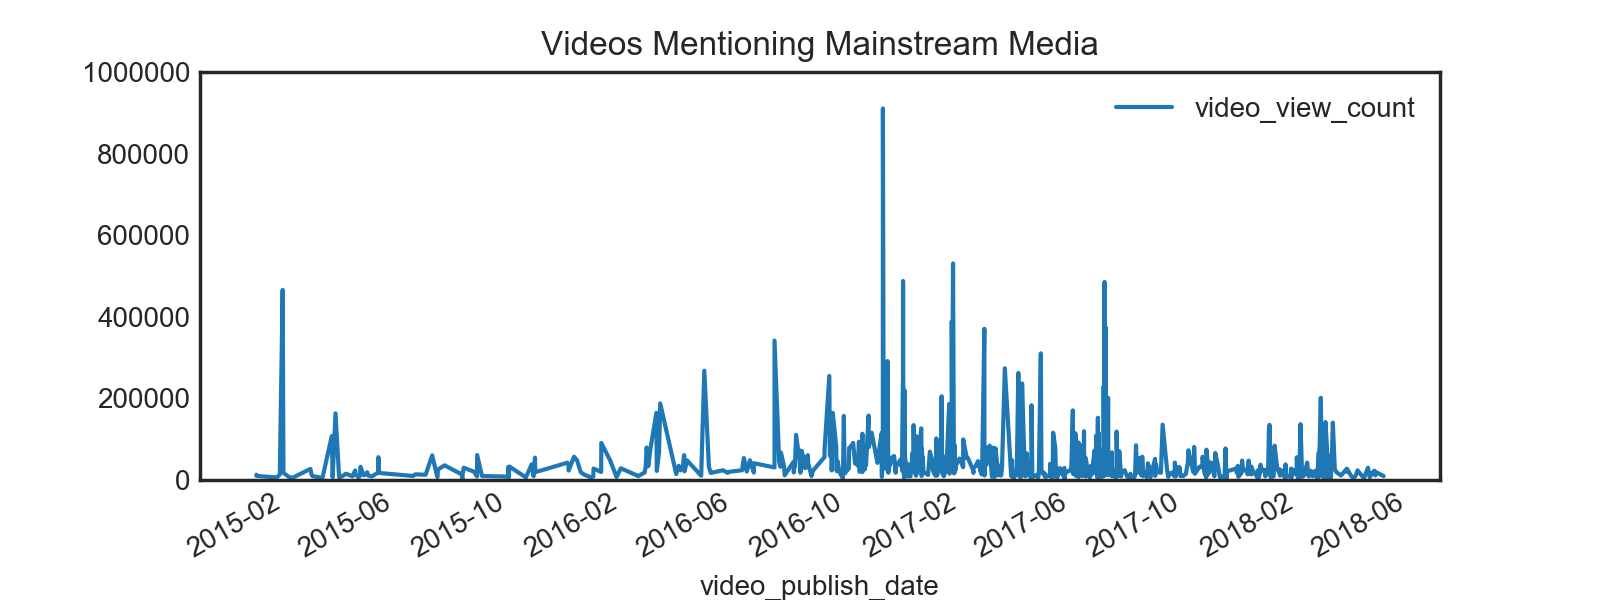

In [116]:
mainstream_rows.video_publish_date = pd.to_datetime(mainstream_rows['video_publish_date'],
                                                    format='%Y-%m-%d %H:%M:%S.%f')

print "Video View Count Across Time for Videos Mentioning MSM"
mainstream_rows.plot(x='video_publish_date', y='video_view_count',
                    figsize=(8,3), title="Videos Mentioning Mainstream Media",
                     fontsize=10, ylim=(0, 1000000))
plt.show()


Videos mentioning the mainstream media started appearing and being viewed mainly during and after the US Presidential Election in November of 2016. Indeed, it would seem that attacking the MSM was not nearly as prelavant before the elections.

# Conclusion <a class="anchor" id="conc"></a>

In conclusion, a very cursory overview of these two datasets (videos mentioning MSM vs. videos not mentioning MSM) reveal an interesting pattern of engagement. 

While discrediting the mainstream media does not lead to an increased number of views on the videos, it does attract viewers who are more likely to "like" the video, and less likely to "dislike" it. In that sense, the audience of these videos may be smaller and more targeted, pointing towards a higher possibility of an echo chamber within this smaller  community. As people who agree with Alex Jones watch these videos, the messages passed across in them may be reinforced in the viewer. This fragmentation of viewers, where people's realities are informed by silos of information, may be an interesting phenonemon to investigate further when exploring media manipulation. 

Furthermore, the 2016 US Presidential Election seems to have sparked interest in the mistrust of mainstream media. There are more videos being made concerning this as well as more viewers seeking these videos out. 

Some questions that could be investigated with more time and a thorough study include: 
1) Do videos mentioning the mainstream media get shared at higher rates, therefore corroborating the idea that while there are fewer viewers, there are tighter networks of people who view these videos?
2) Is there a way of analyzing the caption track on the video to quantify or qualify what kind of attack on the MSM is being made and how strong it is?
3) Would a longer time-series analysis show us a pattern between an uptick of these kinds of videos and US election cycles? 